In [1]:
import pandas as pd
import scanpy as sc

In [2]:
adata = "/Users/jamesbolepan/Documents/research_LiverStress_Immune/rds_manual_extract/liver_liveTissue_RNA.h5ad"
adata = sc.read_h5ad(adata)
adata

AnnData object with n_obs × n_vars = 23819 × 19413
    obs: 'nCount_RNA', 'nFeature_RNA', 'sample_name', 'exp', 'diet', 'age', 'organ', 'mouse_number', 'mouse_and_organ', 'percent.mt', 'celltypes_NicheNet', 'celltypes_figure2plot', 'Age.Diet'

In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


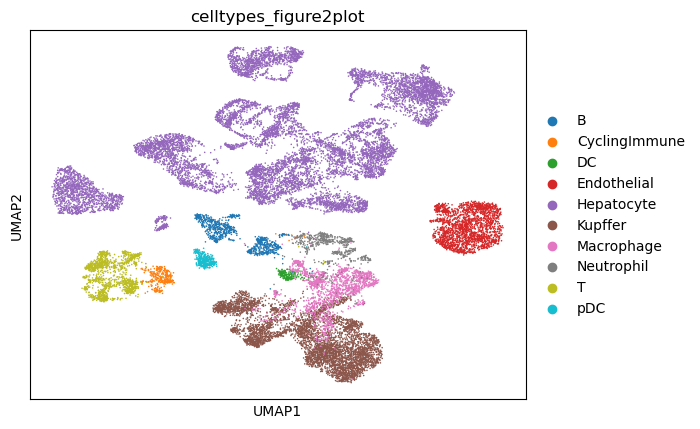

In [6]:
# Plotting the UMAP
sc.pl.umap(adata, color=["celltypes_figure2plot"])

let's do Leidan clustering

/var/folders/s5/wm1n11sn35z51ccfk1fs07qc0000gn/T/ipykernel_39414/2276071930.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, resolution=0.5)


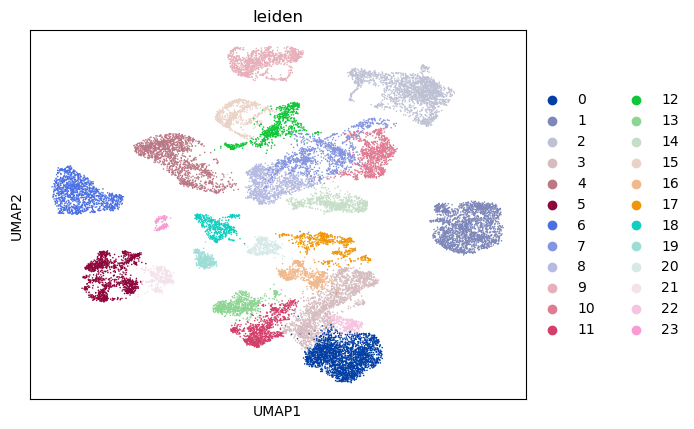

In [7]:
sc.tl.leiden(adata, resolution=0.5)
sc.pl.umap(adata, color=["leiden"])

We are not sure how good this resolution is. We might consider other resolutions later. 

We will the get marker genes

In [9]:
sc.tl.rank_genes_groups(adata, groupby="leiden", method="t-test")

/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/jamesbolepan/miniforge3/envs/newmac_liver_1/lib/python3.12/site-packages

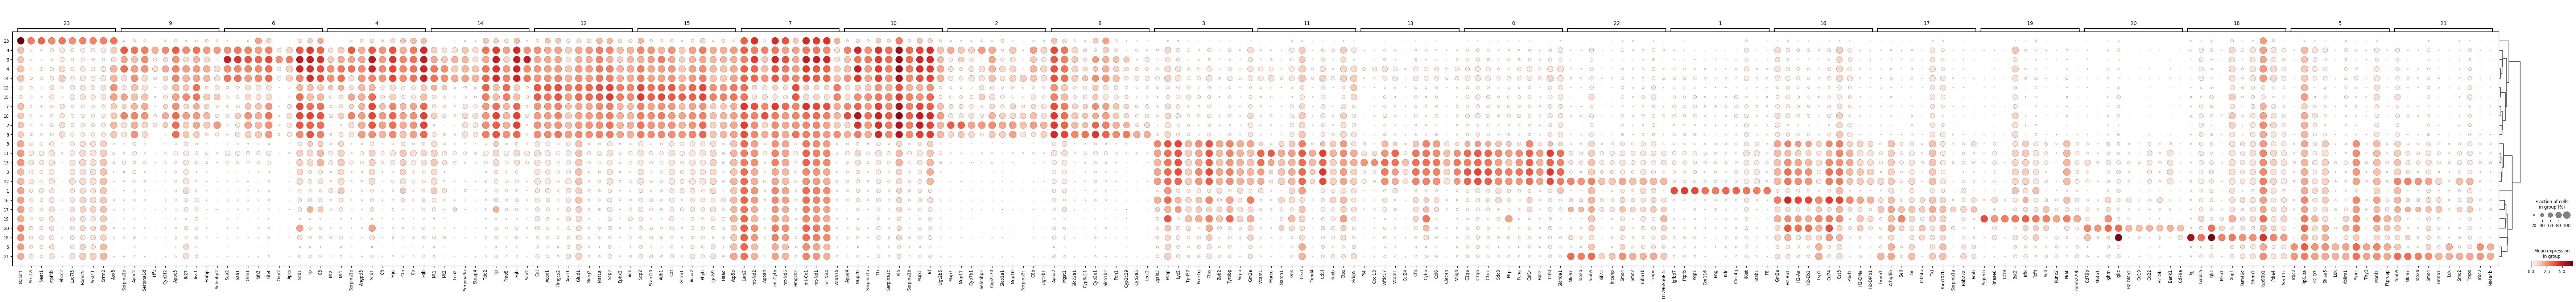

In [12]:
sc.pl.rank_genes_groups_dotplot(adata, groupby="leiden", n_genes=10, dendrogram=True)